# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 K

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score,classification_report, mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from pickle import dump

import gradio as gr

# Data Analysis

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TEAM3/HRDataset_v14.csv")

In [ ]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [ ]:
data.shape

(311, 36)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
data.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
nan = data.isna().any()
nan

Employee_Name                 False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

In [ ]:
data.select_dtypes(include=['object']).columns.tolist()

['Employee_Name',
 'Position',
 'State',
 'DOB',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'HispanicLatino',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'Department',
 'ManagerName',
 'RecruitmentSource',
 'PerformanceScore',
 'LastPerformanceReview_Date']

# Visualisation

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

<ipython-input-11-4dee2012ab54>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


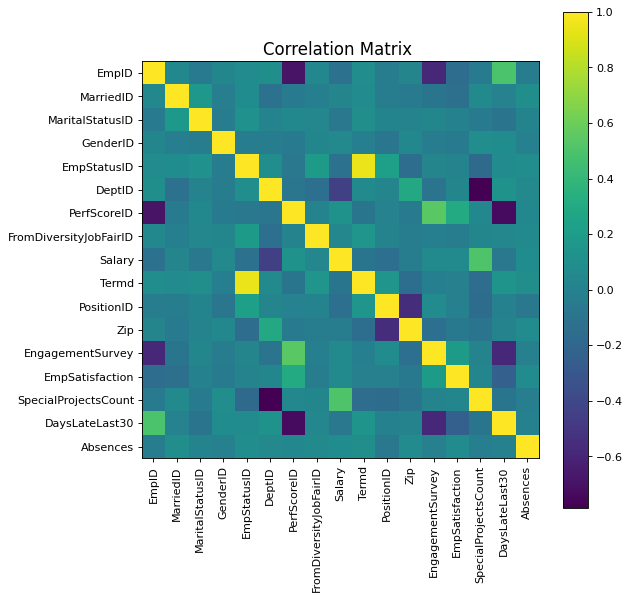

In [ ]:
plotCorrelationMatrix(data, 8)

# Pre-processing

In [ ]:
def encode_dates(df, columns_with_prefixes):
    df = df.copy()

    for column, prefix in columns_with_prefixes:
        df[column] = pd.to_datetime(df[column])

        df[prefix + '_year'] = df[column].apply(lambda x: x.year)
        df[prefix + '_month'] = df[column].apply(lambda x: x.month)
        df[prefix + '_day'] = df[column].apply(lambda x: x.day)

        df = df.drop(column, axis=1)

    return df

def onehot_encode(df, columns_with_prefixes):
    df = df.copy()

    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)

    return df

In [ ]:
def preprocess_inputs(df, scaler):
    df = df.copy()

    df = df.drop(['Employee_Name', 'EmpID', 'MarriedID', 'RaceDesc','Sex','CitizenDesc', 'HispanicLatino','Position', 'State', 'MaritalDesc', 'Department', 'Zip', 'PerformanceScore', 'EmpStatusID', 'EmploymentStatus', 'DateofTermination', 'TermReason', 'ManagerID'], axis=1)

    date_columns = [
        ('DOB', "DOB"),
        ('DateofHire', "DOH"),
        ('LastPerformanceReview_Date', "PRD")
    ]
    df = encode_dates(df, columns_with_prefixes=date_columns)

    nominal_columns = [
        ('ManagerName', "MN"),
        ('RecruitmentSource', "RS")
    ]
    df = onehot_encode(df, columns_with_prefixes=nominal_columns)

    y = df['Termd'].copy()
    X = df.drop('Termd', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

    return X_train, X_test, y_train, y_test

In [ ]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = preprocess_inputs(data, scaler)

In [ ]:
X_train

,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,...,MN_Webster Butler,RS_CareerBuilder,RS_Diversity Job Fair,RS_Employee Referral,RS_Google Search,RS_Indeed,RS_LinkedIn,RS_On-line Web application,RS_Other,RS_Website
0,0.25,1.0,0.4,0.666667,0.0,0.144584,0.481481,0.819588,1.00,0.875,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.00,1.0,0.8,0.666667,0.0,0.006743,0.666667,0.896907,1.00,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.25,1.0,0.8,0.666667,0.0,0.051387,0.703704,0.793814,1.00,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.00,0.0,1.0,0.666667,0.0,0.090991,0.074074,1.000000,1.00,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.8,0.666667,0.0,0.147067,0.629630,0.876289,0.75,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.00,1.0,0.8,0.000000,0.0,0.052470,0.703704,0.484536,0.25,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
244,0.00,1.0,0.8,0.666667,0.0,0.030314,0.666667,0.819588,0.75,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
245,0.00,0.0,0.8,1.000000,0.0,0.062302,0.666667,0.716495,0.75,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
246,0.25,0.0,1.0,0.666667,0.0,0.073548,0.074074,0.768041,0.75,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MaritalStatusID             248 non-null    float64
 1   GenderID                    248 non-null    float64
 2   DeptID                      248 non-null    float64
 3   PerfScoreID                 248 non-null    float64
 4   FromDiversityJobFairID      248 non-null    float64
 5   Salary                      248 non-null    float64
 6   PositionID                  248 non-null    float64
 7   EngagementSurvey            248 non-null    float64
 8   EmpSatisfaction             248 non-null    float64
 9   SpecialProjectsCount        248 non-null    float64
 10  DaysLateLast30              248 non-null    float64
 11  Absences                    248 non-null    float64
 12  DOB_year                    248 non-null    float64
 13  DOB_month                   248 non

In [ ]:
y_train

109    0
247    1
234    1
202    0
78     0
      ..
188    1
71     0
106    0
270    0
102    0
Name: Termd, Length: 248, dtype: int64

# Training

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly','rbf', 'sigmoid','linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(C=0.1,solver='lbfgs', max_iter=750),
    "Support Vector Machine": SVC(C=0.1, gamma=0.001, kernel = "linear"),
    "Decision Tree": DecisionTreeClassifier(splitter = "random", min_samples_leaf = 80),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators = 50,min_samples_split = 70, max_depth=2),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

K-Nearest Neighbors trained.
Logistic Regression trained.
Support Vector Machine trained.
Decision Tree trained.
Naive Bayes trained.
Random Forest trained.


In [ ]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(accuracy_score(y_test, model.predict(X_test)) * 100))

K-Nearest Neighbors Accuracy: 77.78%
Logistic Regression Accuracy: 87.30%
Support Vector Machine Accuracy: 92.06%
Decision Tree Accuracy: 65.08%
Naive Bayes Accuracy: 79.37%
Random Forest Accuracy: 88.89%


In [ ]:
from sklearn.model_selection import cross_val_score
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, cv=5)
  print( name, "\n", scores*100)

K-Nearest Neighbors 
 [72.         80.         70.         73.46938776 81.63265306]
Logistic Regression 
 [82.         80.         82.         81.63265306 89.79591837]
Support Vector Machine 
 [94.         90.         88.         93.87755102 95.91836735]
Decision Tree 
 [82.         66.         66.         73.46938776 67.34693878]
Naive Bayes 
 [76.         74.         72.         75.51020408 83.67346939]
Random Forest 
 [90.         94.         92.         97.95918367 93.87755102]


In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for name, alg in models.items():

    predicted = alg.predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    #MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1

MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,AUC
2,SVC,0.9476,0.9206,0.886364
5,RandomForestClassifier,0.9073,0.8889,0.840909
1,LogisticRegression,0.8710,0.8730,0.818182
4,MultinomialNB,0.8024,0.7937,0.736142
0,KNeighborsClassifier,0.8468,0.7778,0.734479
3,DecisionTreeClassifier,0.6694,0.6508,0.500000


In [ ]:
for name, model in models.items():
    p = model.predict(X_test)
    print(name)
    print(p)

K-Nearest Neighbors
[1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0]
Logistic Regression
[0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0]
Support Vector Machine
[0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
Decision Tree
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Naive Bayes
[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0]
Random Forest
[0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0]


In [ ]:
X_test.iloc[-2]

# Saving the model

In [ ]:
m = SVC(C=0.1, gamma=0.001, kernel = "linear")
m.fit(X_train, y_train)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [ ]:
dump(m, open('model.pkl', 'wb'))
dump(scaler, open('scaler.pkl', 'wb'))

# Deployment

In [ ]:
pos = dict(zip(data["Position"].unique(), data['PositionID'].unique()))
pos = dict(sorted(pos.items(), key=lambda item: item[1]))

In [ ]:
def is_fired(*arg1):
  args = list(arg1)
  ms = ["Single", "Married", "Divorced", "Separated", "Widowed"]
  gen = ["Female", "Male"]
  dept = ["Admin Offices", "Executive Office", "IT/IS", "Software Engineering", "Production", "Sales"]
  perfscore = ["PIP", "Needs Improvement", "Fully Meets", "Exceeds"]
  dive = ["Yes", "No"]
  args[0] = ms.index(args[0])
  args[1] = gen.index(args[1])
  args[2] = dept.index(args[2])+1
  args[3] = perfscore.index(args[3])+1
  args[4] = dive.index(args[4])
  args[6] = pos[args[6]]
  args = pd.DataFrame(args).T
  args.columns = ["MaritalStatusID", "GenderID", "DeptID", 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'PositionID', "Date of Birth", "Date of Hire", "Manager Name", 'Recruitment Source', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', "Last Performance Review Date",  'DaysLateLast30', 'Absences']
  col_list = list(X_train.columns)

  date_columns = [
        ('Date of Birth', "DOB"),
        ('Date of Hire', "DOH"),
        ('Last Performance Review Date', "PRD")
    ]
  args = encode_dates(args, columns_with_prefixes=date_columns)

  nominal_columns = [
        ('Manager Name', "MN"),
        ('Recruitment Source', "RS")
    ]
  args = onehot_encode(args, columns_with_prefixes=nominal_columns)
  args2 = args.reindex(columns=col_list, fill_value=0)
  args2 = scaler.transform(args2)
  print(args2)
  op = m.predict(args2)
  if op[0] == 0:
    return "Not Terminated"
  return "Terminated"

In [ ]:
title = "Employee Termination Forecasting"
description="""
<center>
Check if you are likely to be terminated
</center>
"""
css = ".gradio-container {background: url('https://storage.googleapis.com/cig-shared/prod/bmd/main/web/2022/05/59d03dd0-termination-form-1080x720px.png'); height: 100%; background-position: center; background-repeat: no-repeat; background-size: cover;background-attachment: fixed;}"

In [ ]:
demo = gr.Interface(is_fired,
                    [gr.Dropdown(["Single", "Married", "Divorced", "Separated", "Widowed"], label = "Marital Status", info = "Select your marital status"),
                    gr.Radio(["Female", "Male"], label = "Gender", info = "Select your gender"),
                    gr.Dropdown(["Admin Offices", "Executive Office", "IT/IS", "Software Engineering", "Production", "Sales"], label = "Department", info = "Select your department"),
                    gr.Dropdown(["PIP", "Needs Improvement", "Fully Meets", "Exceeds"], label = "Performance", info = "Select your performance score"),
                    gr.Radio(["Yes", "No"], label = "Diversity", info = "Is your work diverse form job?"),
                    gr.Number(label = "Salary", info = "Enter your salary"),
                    gr.Textbox(label = "Position", info = "Enter your position"),
                    gr.Textbox(label = "Date of Birth", info = "Enter your DOB in mm/dd/yyyy format"),
                    gr.Textbox(label = "Date of Hire", info = "Enter your Date of Hire in mm/dd/yyyy format"),
                    gr.Textbox(label = "Manager Name"),
                    gr.Dropdown(["LinkedIn", "Indeed", "Google Search", "Employee Referral", 'Diversity Job Fair', 'On-line Web application', 'CareerBuilder', 'Website','Other'], label = "Recruitment Source"),
                    gr.Number(label = "Engagement Survey", info = "Enter your survey score"),
                    gr.Slider(1,5, value = 3, label = "Employee Satisfaction", info = "Choose between 1 and 5", step = 1),
                    gr.Number(label = "Special Projects", info = "Enter the number of your special projects"),
                    gr.Textbox(label = "Last Performance Review Date", info = "Enter your Last performance review date in mm/dd/yyyy format"),
                    gr.Slider(0,30, value = 0, label = "Days Late", info = "Choose the number of Days Late in last 30 days", step = 1),
                    gr.Slider(0,30, value = 1, label = "Absences", info = "Choose number of absences in last 30 days", step = 1)], outputs = "text",
                    title = title, description = description, css = css)

In [ ]:
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>